In [1]:
# Walmart Sales Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving Walmart_customer_purchases.csv to Walmart_customer_purchases.csv


In [7]:
df = pd.read_csv("Walmart_customer_purchases.csv")
# print(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB
None


In [8]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [9]:
# Convert 'Purchase_Date' to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

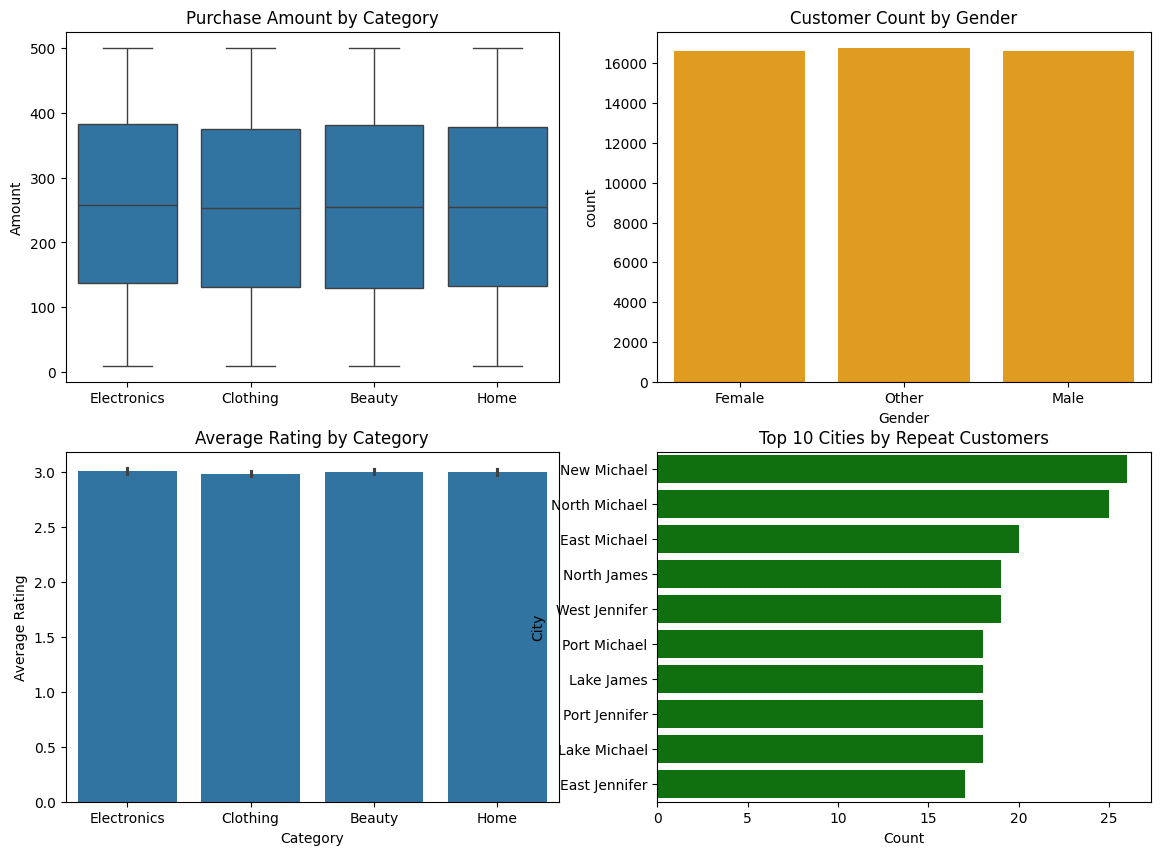

In [29]:
# Prepare key visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Purchase Amount by Category
sns.boxplot(data=df, x='Category', y='Purchase_Amount', ax=axes[0, 0])
axes[0, 0].set_title("Purchase Amount by Category")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Amount")

# 2. Count of Customers by Gender
sns.countplot(data=df, x='Gender',color='orange' ,ax=axes[0, 1])
axes[0, 1].set_title("Customer Count by Gender")

# 3. Average Rating by Product Category
sns.barplot(data=df, x='Category', y='Rating', estimator='mean', ax=axes[1, 0])
axes[1, 0].set_title("Average Rating by Category")
axes[1, 0].set_ylabel("Average Rating")

# 4. Repeat Customers by City
repeat_city = df[df['Repeat_Customer'] == 'Yes']['City'].value_counts().head(10)
sns.barplot(x=repeat_city.values, y=repeat_city.index,color='green', ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Cities by Repeat Customers")
axes[1, 1].set_xlabel("Count")
plt.show()
